# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric and our analysis? 

This metric is a poor choice for average order value due to the existence of extremely large outliers. There are a few outliers that are swaying the average in a direction that is misrepresentative of the AOV. The outliers can be seen in a few ways. First, the variance is 41282 which is absurdly high given that an order_value can not be negative and the average order value is 3145. This implies very large outliers. Secondly, in the scatter plot you can clearly see a line around an order value of 700000 which is not being done by your typical consumer. Third, from the work below it is shown that 1.26% of orders are over the AOV found with the previous metric.

- Propose some new metrics that better represents the behavior of the stores' customers. Why are these metrics better? You can propose as many new metrics as you wish but quality heavily outweights quantity.

A new metric to use would be the median order value. This is suitable for the current situation since the median is resistant to outliers.

- Find the values of your new metrics.

The median order value is $284.00 which seems more reasonable a purchase by your average consumer.

- Report any other interesting findings.

Show all of your work in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./orders.csv")
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [10]:
df.describe()

,order_id,shop_id,user_id,order_value,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<AxesSubplot:xlabel='order_id', ylabel='order_value'>

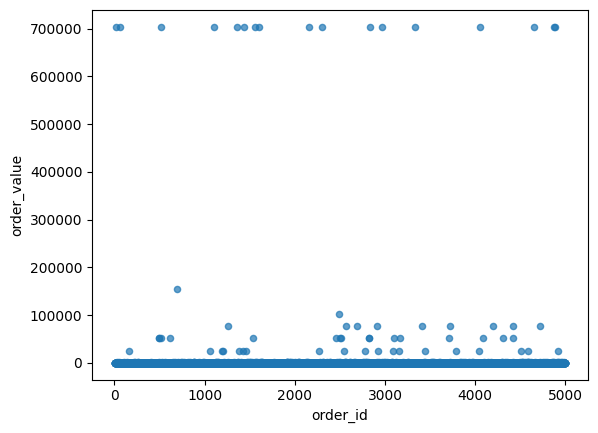

In [6]:
df.plot.scatter(x="order_id", y="order_value", alpha=0.7)

In [11]:
(df[df["order_value"] >= df["order_value"].mean()].count()/df["order_value"].count())*100

order_id          1.26
shop_id           1.26
user_id           1.26
order_value       1.26
total_items       1.26
payment_method    1.26
created_at        1.26
dtype: float64

In [12]:
df["order_value"].median()

284.0